# Case Study - Develop a model to assign lead scores predicting conversion likelihood, aiming for an 80% conversion rate, enabling X Education to prioritize and engage the most promising leads effectively.


# AIM and Purpose
Build a logistic regression model to assign lead scores (0-100) predicting conversion likelihood. Adjust the model based on future company requirements outlined in a provided document, and summarize recommendations in a PPT.

In [1509]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning Data


In [1510]:
# Reading data from CSV file
lead = pd.read_csv('Leads.csv')
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [1511]:
# Analysing the entire data set, which information we are getting from the data set.
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1512]:
# Table information
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1513]:
lead.shape

(9240, 37)

In [1514]:
# Numeric values, mean, min, max and overview of all data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1515]:
# Replacing all select into nan because slect means no one selected any values
lead = lead.replace('select',np.nan)

In [1516]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1517]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1518]:
lead.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1519]:
# Dropped the unique values
lead1= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [1520]:
# dropping all the columns, which are more then 40% null values 
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [1521]:
lead2 = lead1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
lead2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [1522]:
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# Note : We can see a tremendous null value, which we can not remove because it will impact our data and analysis. We are going to replace NAN value with Not given

In [1523]:
lead2['Specialization'] = lead2['Specialization'].fillna('not given') 
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna('not given')
lead2['Country'] = lead2['Country'].fillna('not given')
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna('not given')
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [1524]:
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [1525]:
lead2["Country"].value_counts()

Country
India                   6492
not given               2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [1526]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not given":
        category = "not given"
    else:
        category = "out of india"
    return category

lead2['Country'] = lead2.apply(lambda x:slots(x['Country']), axis = 1)
lead2['Country'].value_counts()

Country
India           6492
not given       2461
out of india     287
Name: count, dtype: int64

In [1527]:
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [1528]:
# What is the percentage if we remove the null values
round(100*(sum(lead2.isnull().sum(axis=1) > 1)/lead2.shape[0]),2)

1.48

In [1529]:
lead3 = lead2[lead2.isnull().sum(axis=1) <1]

In [1530]:
# Missing values Percentage
round(100*(lead3.isnull().sum()/len(lead3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [1531]:
# Removing ID because they are unique for each individual
finalLead = lead3.drop('Prospect ID', axis=1)
finalLead.shape

(9074, 21)

# Exploratory Data Analysis - We will observe in there - Univariate Analysis, Categorical Variables and Numerical Variables

In [1532]:
finalLead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

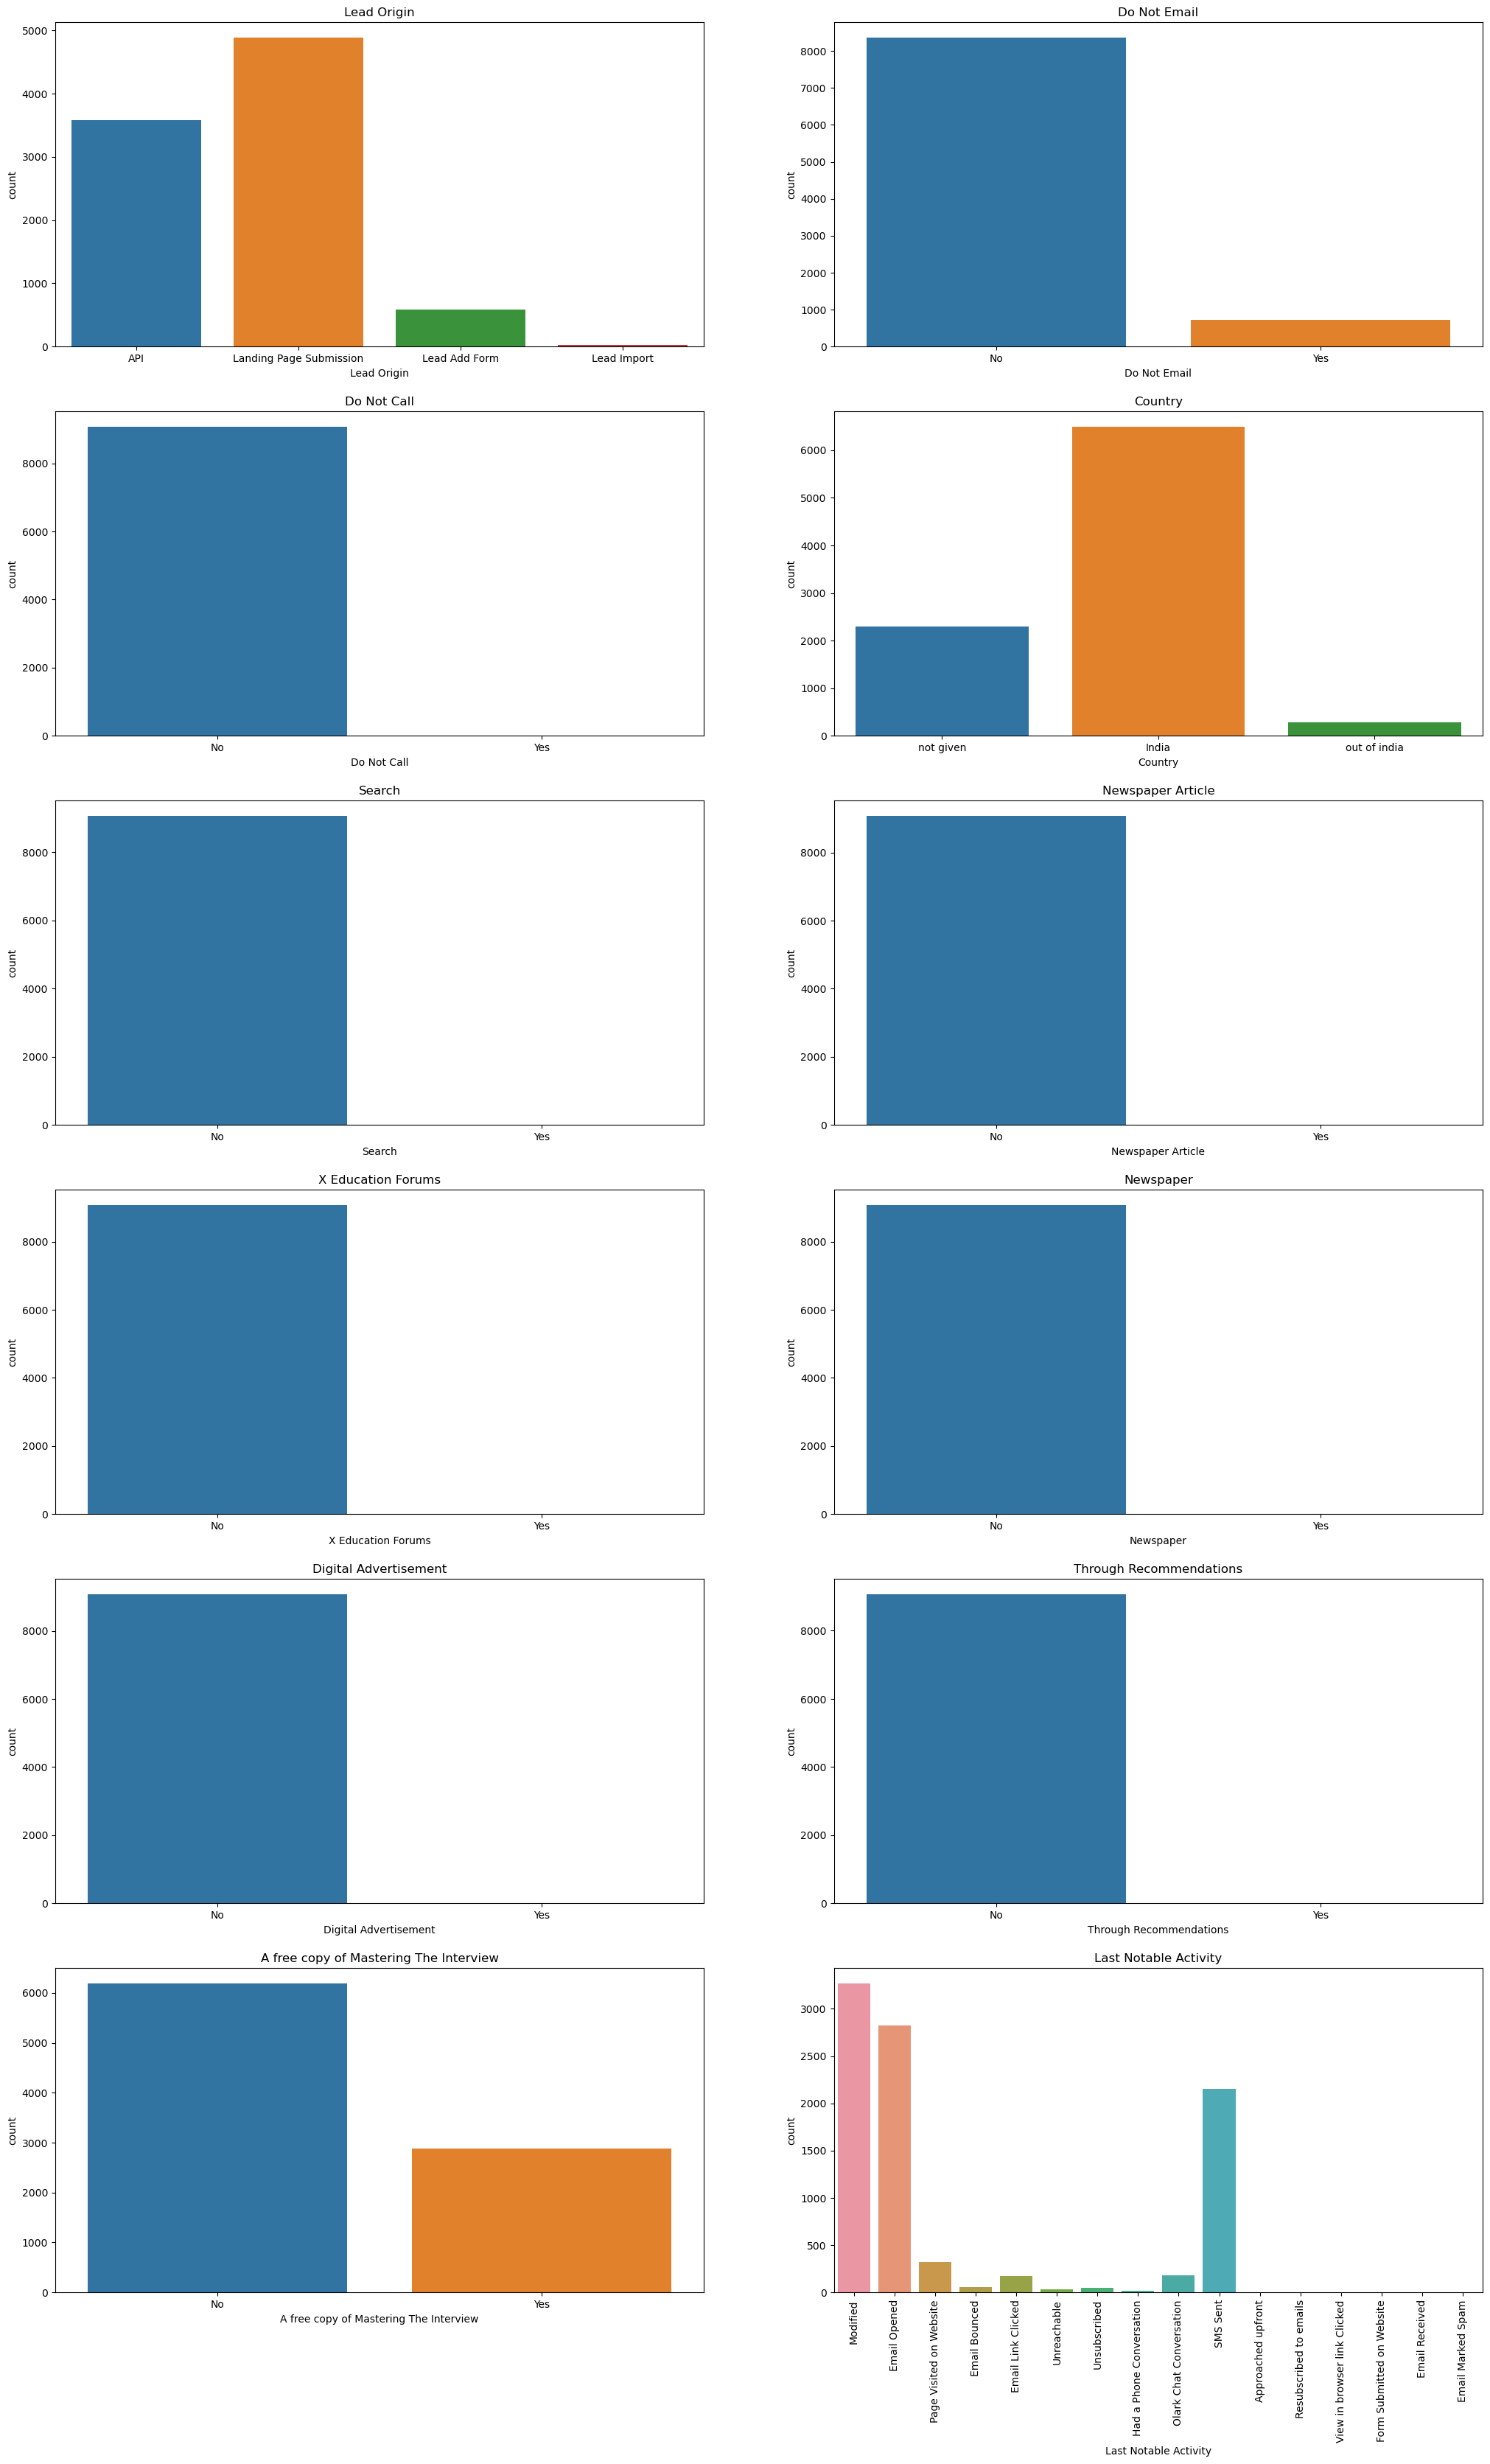

In [1644]:
plt.figure(figsize = (25,40))

plt.subplot(6,2,1)
sns.countplot(finalLead, x='Lead Origin')
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(finalLead, x='Do Not Email')
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(finalLead, x='Do Not Call')
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(finalLead, x='Country')
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(finalLead, x='Search')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(finalLead, x='Newspaper Article')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(finalLead, x= 'X Education Forums')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(finalLead, x='Newspaper')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(finalLead, x='Digital Advertisement')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(finalLead, x='Through Recommendations')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(finalLead, x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(finalLead, x='Last Notable Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

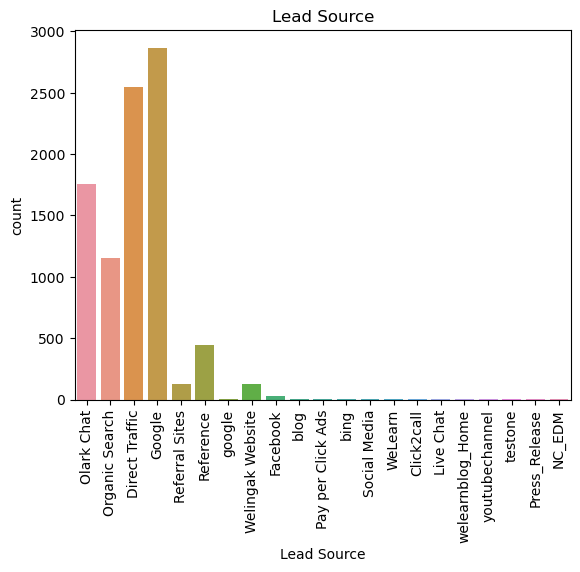

In [1534]:
sns.countplot(finalLead, x='Lead Source').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

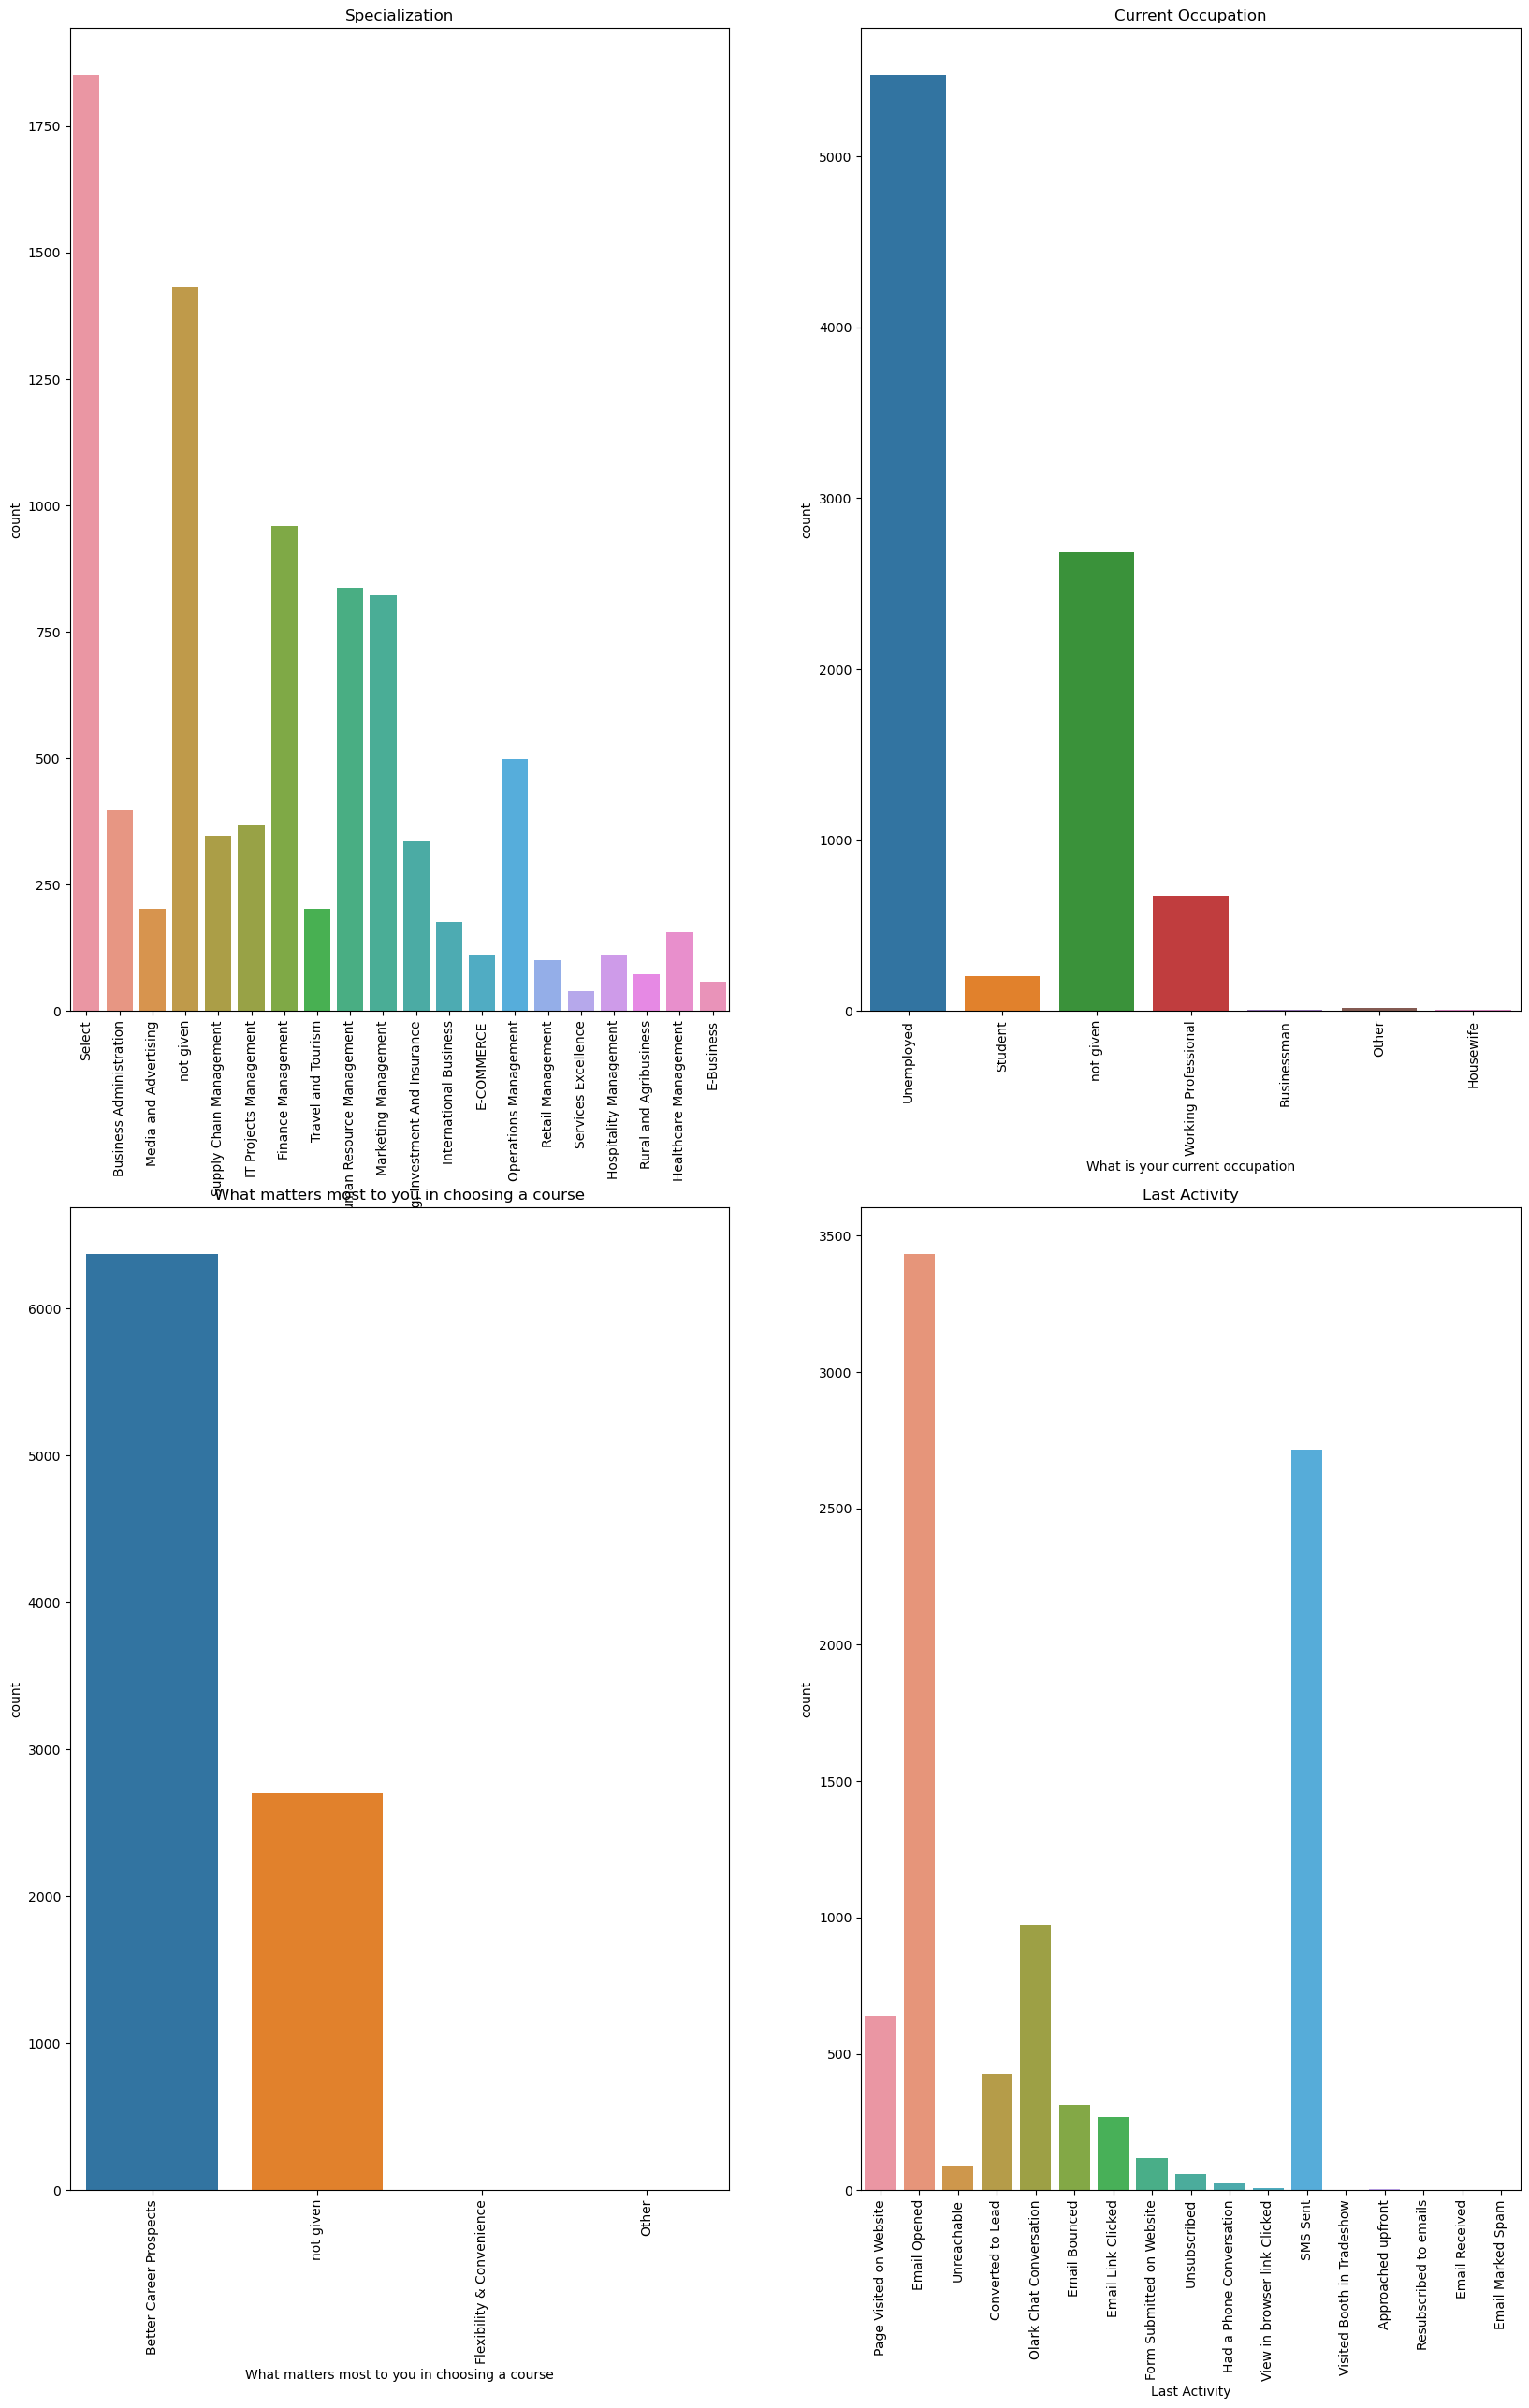

In [1535]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(finalLead, x='Specialization').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(finalLead, x='What is your current occupation').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(finalLead, x='What matters most to you in choosing a course').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(finalLead, x='Last Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

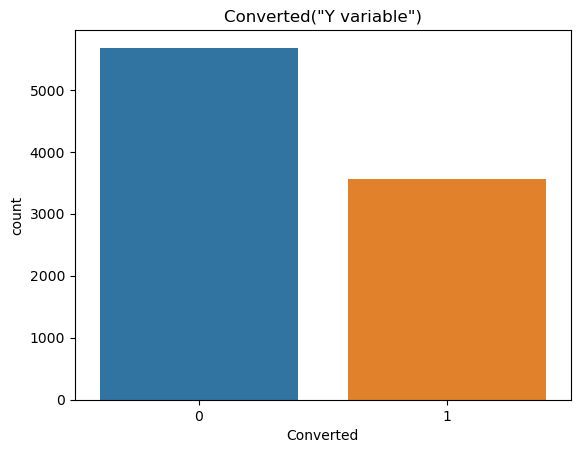

38.53896103896104

In [1536]:
sns.countplot(lead, x='Converted')
plt.title('Converted("Y variable")')
plt.show()
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

In [1537]:
# Numerical Variables
finalLead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

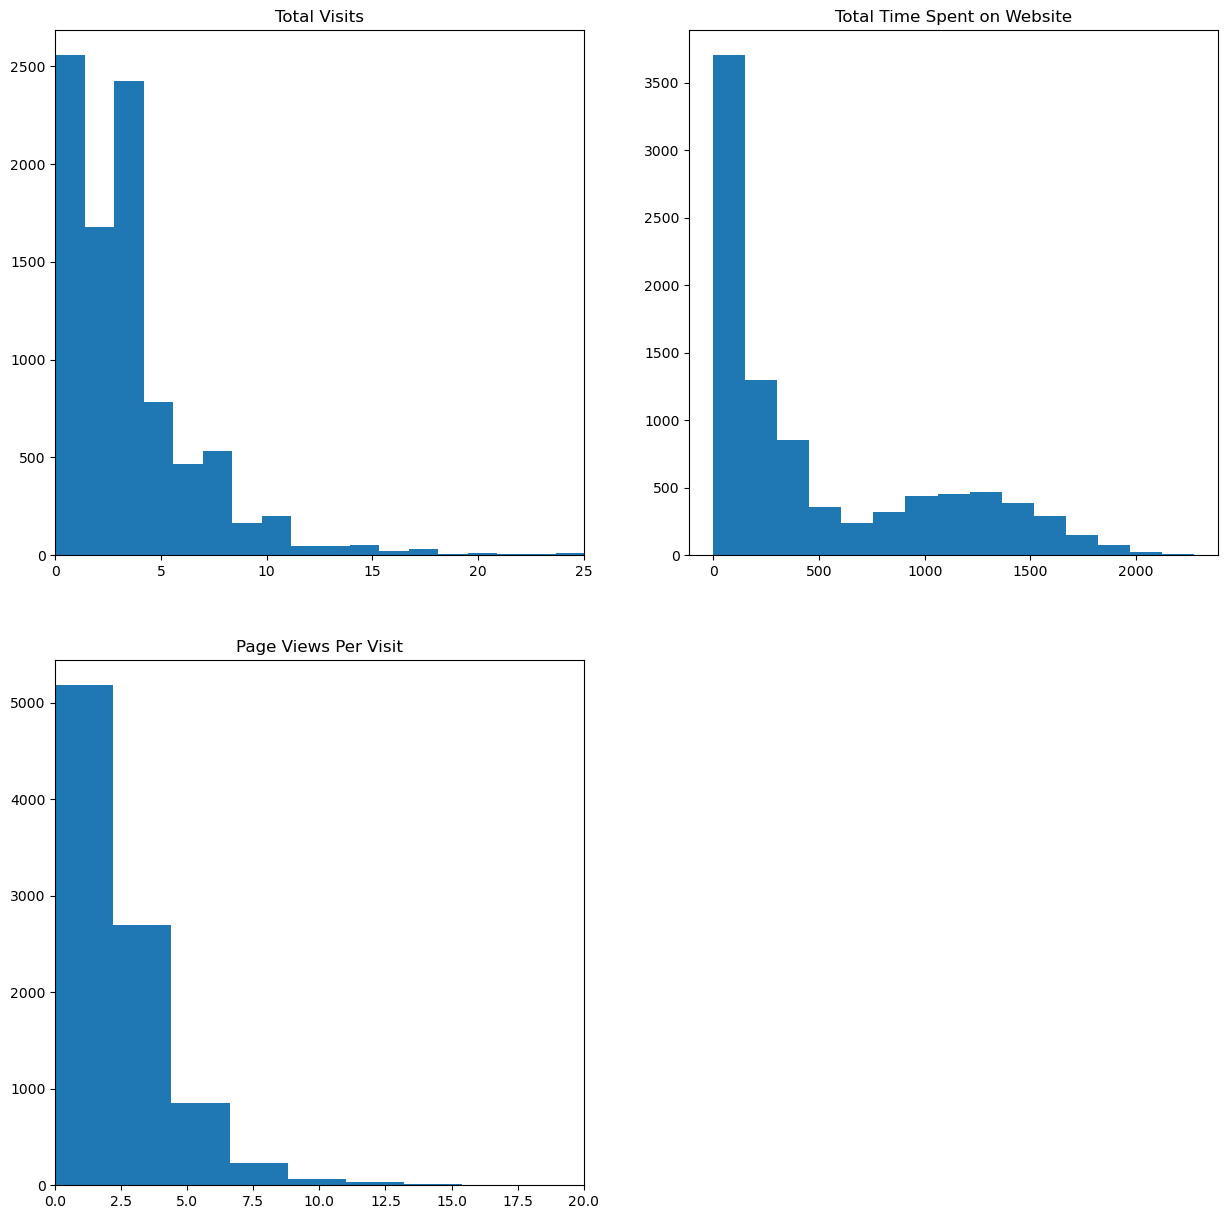

In [1538]:
plt.figure(figsize = (15,15))
plt.subplot(221)
plt.hist(finalLead['TotalVisits'], bins = 180)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(finalLead['Total Time Spent on Website'], bins = 15)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(finalLead['Page Views Per Visit'], bins = 25)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

# Categorical variables Between Converted

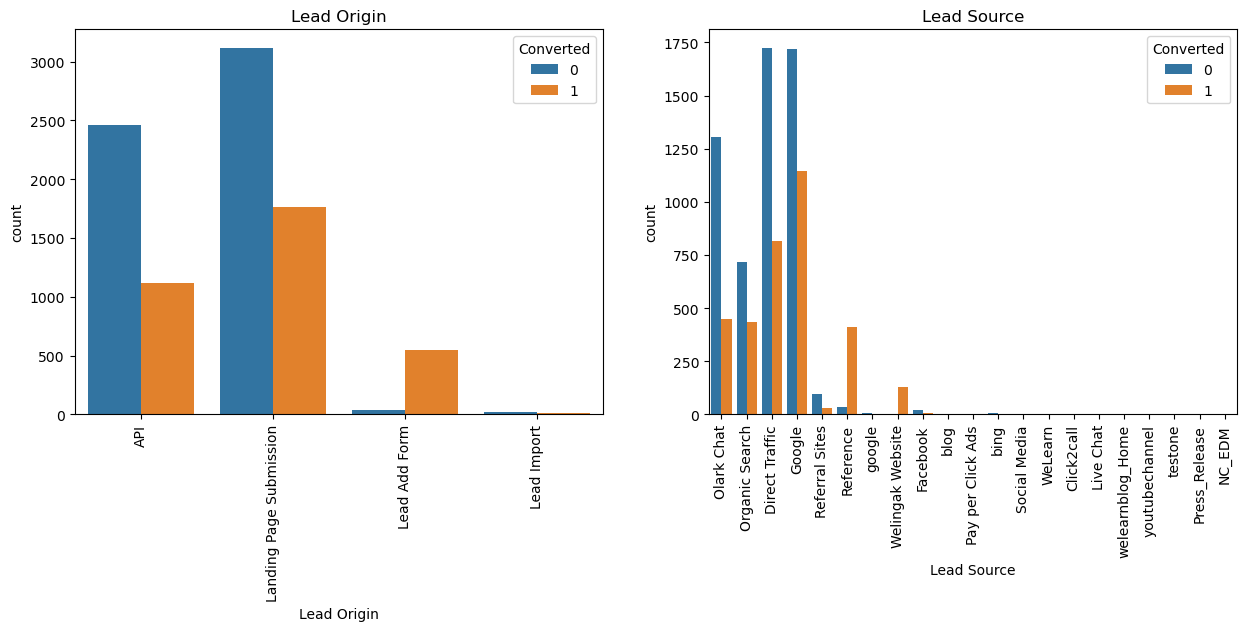

In [1539]:
finalLead["Converted"] = finalLead["Converted"].astype(str)
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

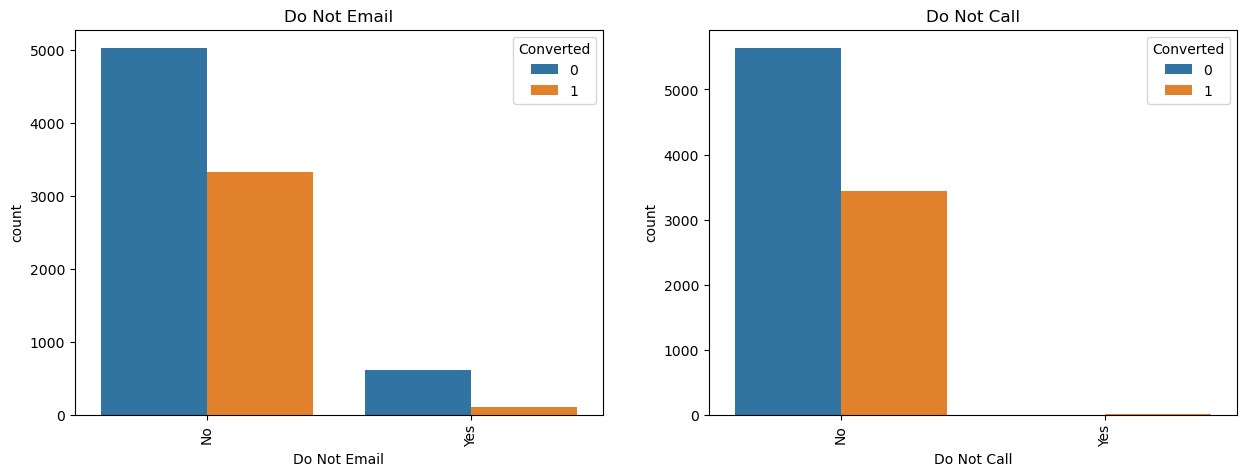

In [1540]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

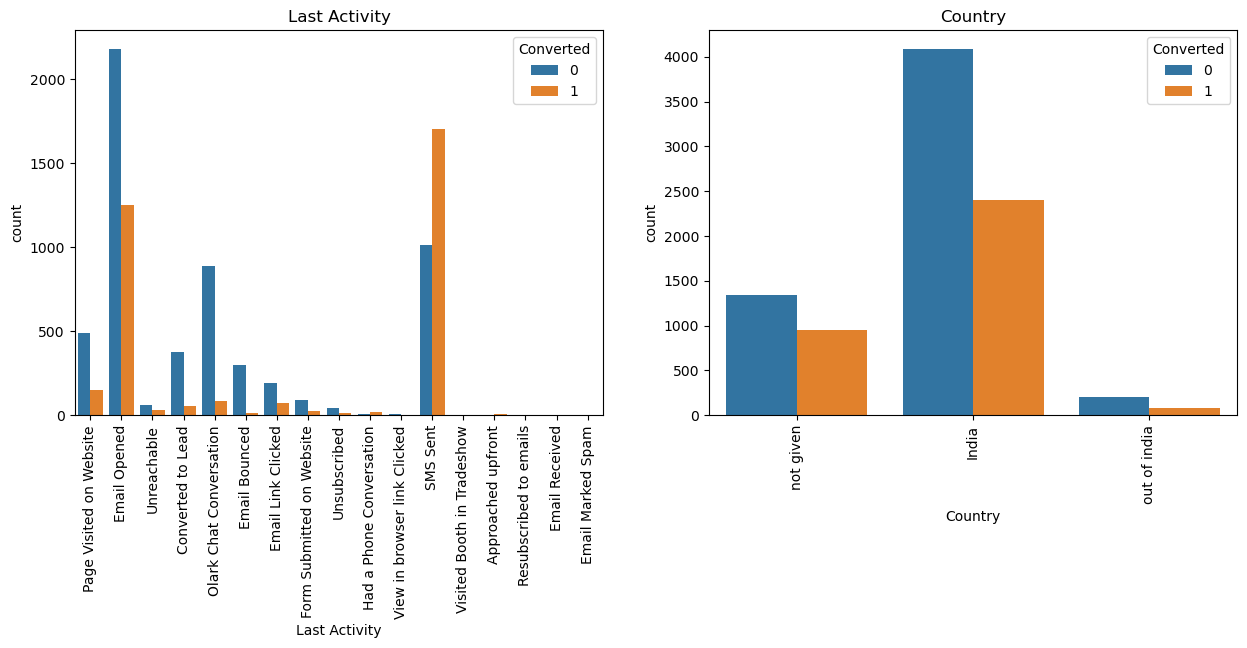

In [1541]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

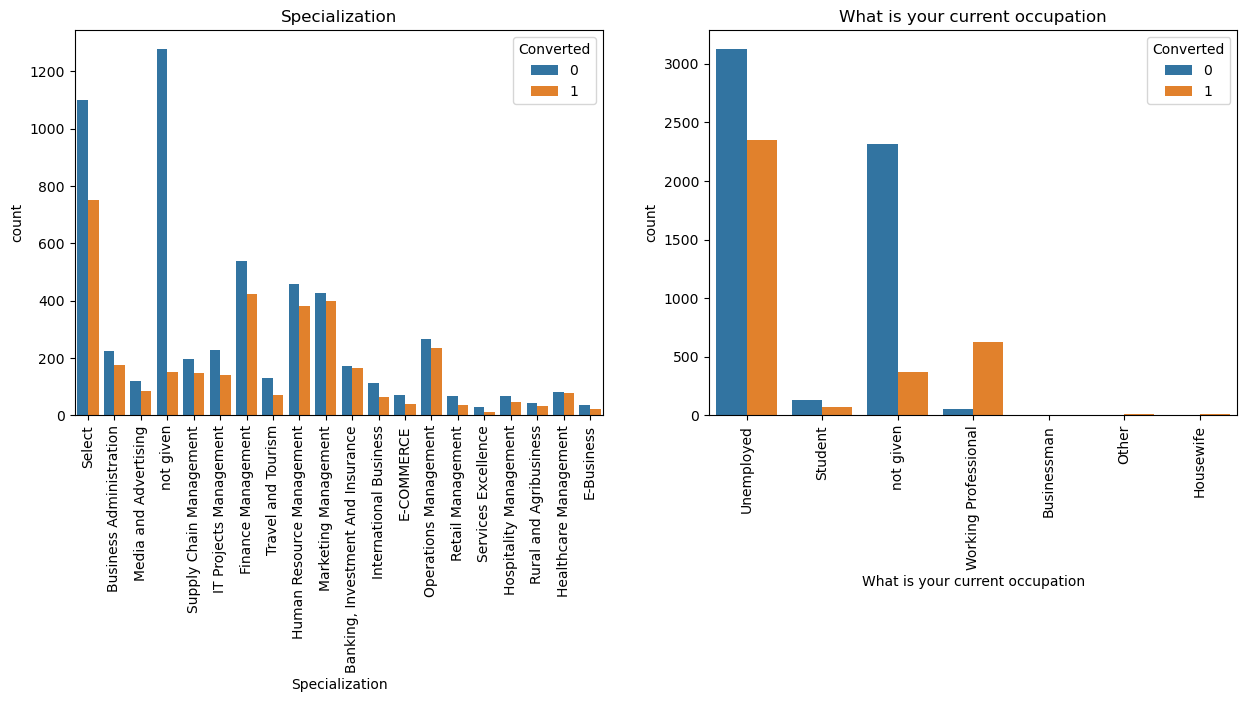

In [1542]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

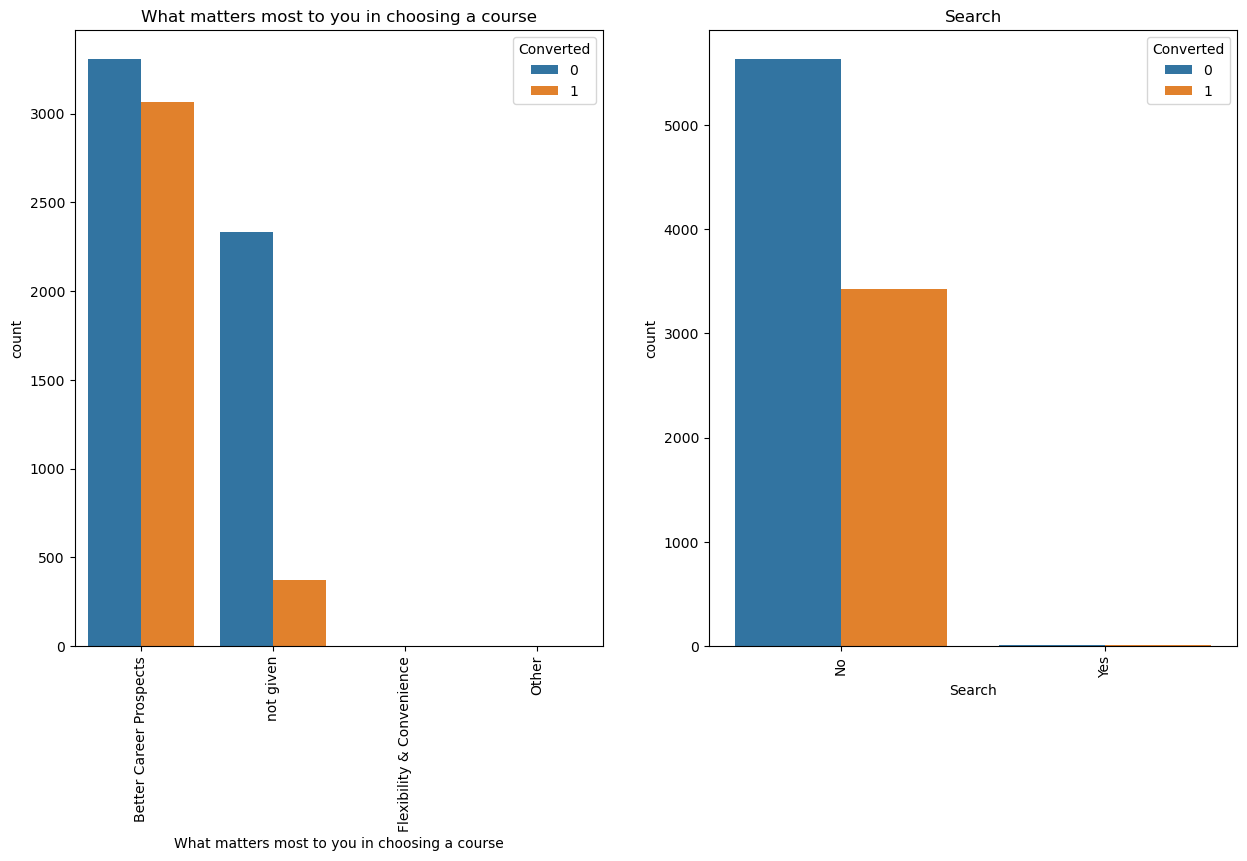

In [1543]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

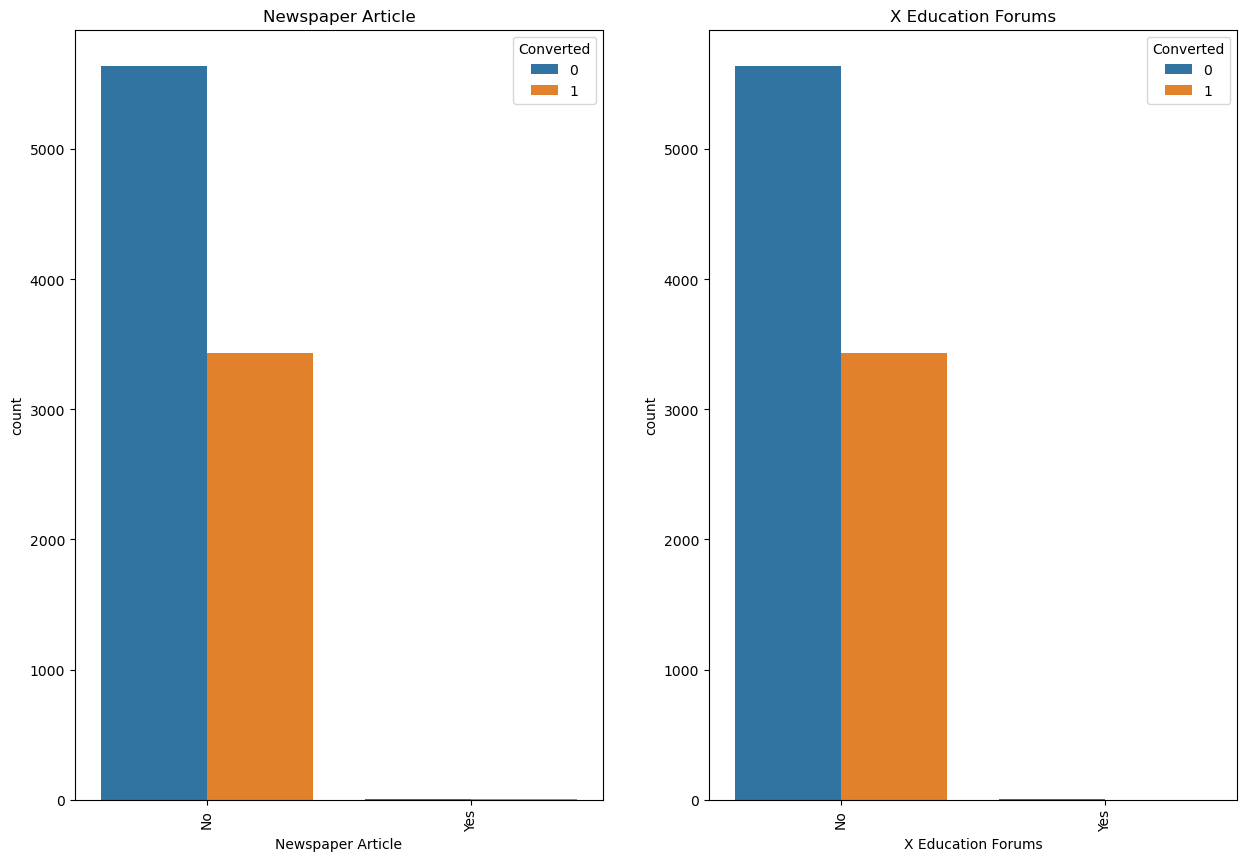

In [1544]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

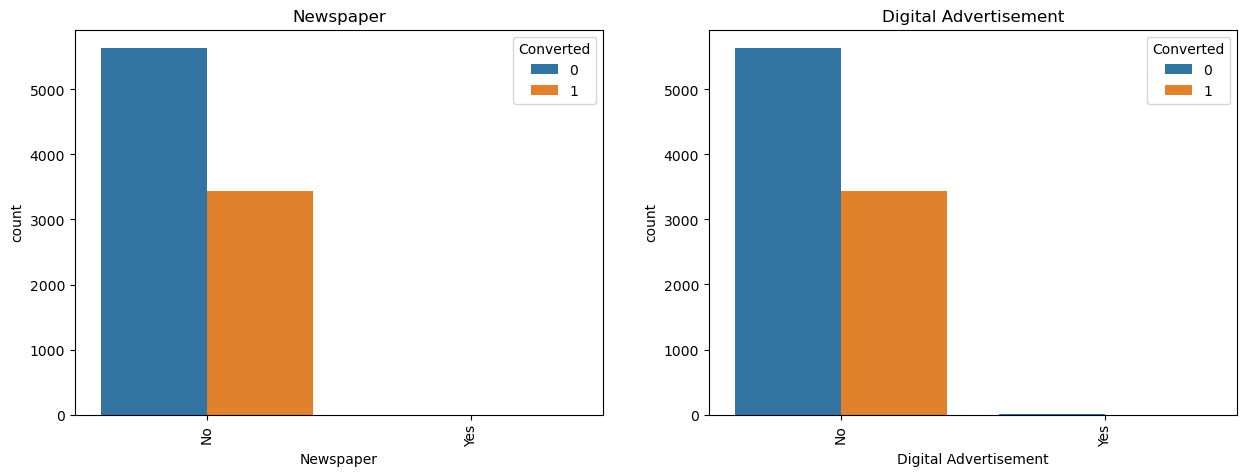

In [1545]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

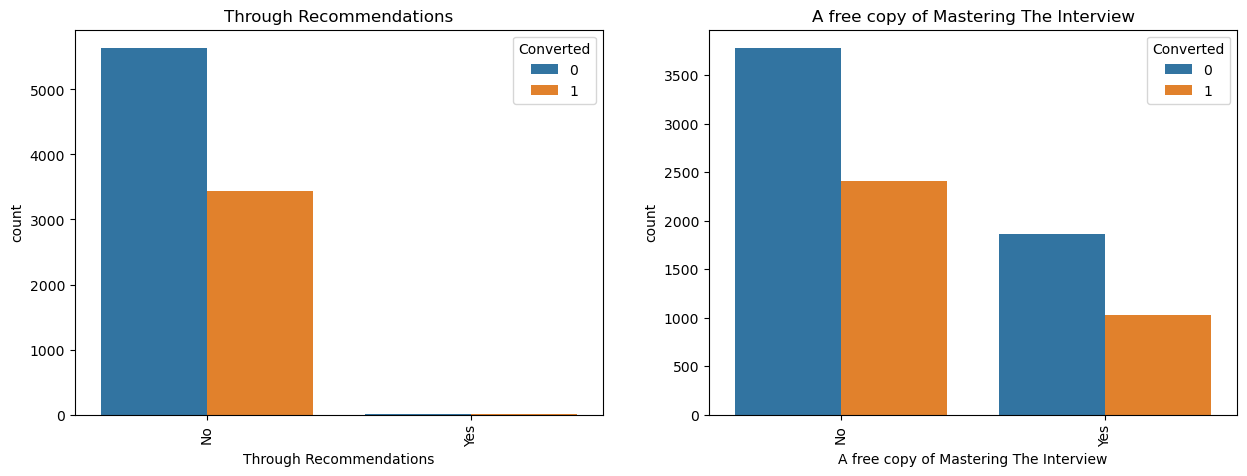

In [1546]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

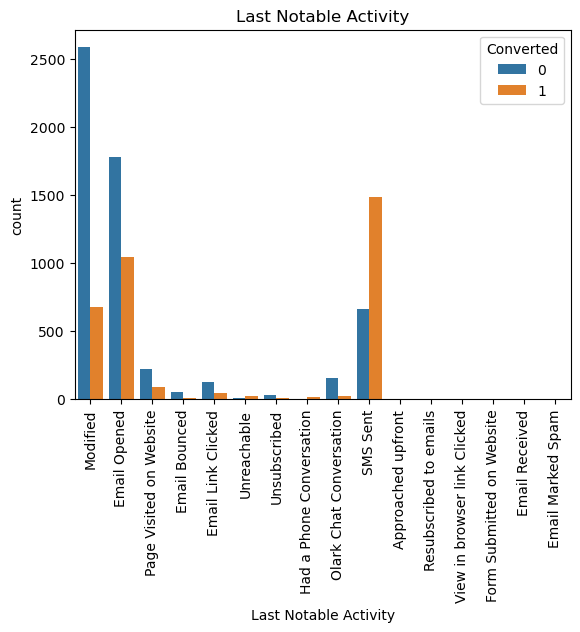

In [1547]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= finalLead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Note : A number of elements have sparse data, which reduces their analytical relevance, according to the EDA. To increase model accuracy, it is advisable to take these components out or imputation them. Reliability and performance of the logistic regression model in lead conversion prediction will be improved by concentrating on features with adequate data.

In [1548]:
numericalPresentation = finalLead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numericalPresentation.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


The numerical analysis shows no major outliers, allowing us to proceed confidently to the next phase of analysis.   

# Dummy Variables

In [1549]:
finalLead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   object 
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [1550]:
finalLead.loc[:, finalLead.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1551]:
# get_dummies will help us to create dummy variable 
dummy = pd.get_dummies(finalLead[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
finalDummy = pd.concat([finalLead, dummy], axis=1)
finalDummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not given,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,out of india,...,False,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,False,False,False,False,False,False,True,False,False,False
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,False,False,False,False,False,False,True,False,False,False


In [1552]:
finalDummy = finalDummy.drop(['What is your current occupation_not given','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not given','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis= 1)
finalDummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Required the data Test-Train Split

In [1553]:
from sklearn.model_selection import train_test_split

In [1554]:
X = finalDummy.drop(['Converted'], axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [1555]:
# Target Variable
y = finalDummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: object

In [1556]:
# Split the dataset into 70% train and 30% test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [1557]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


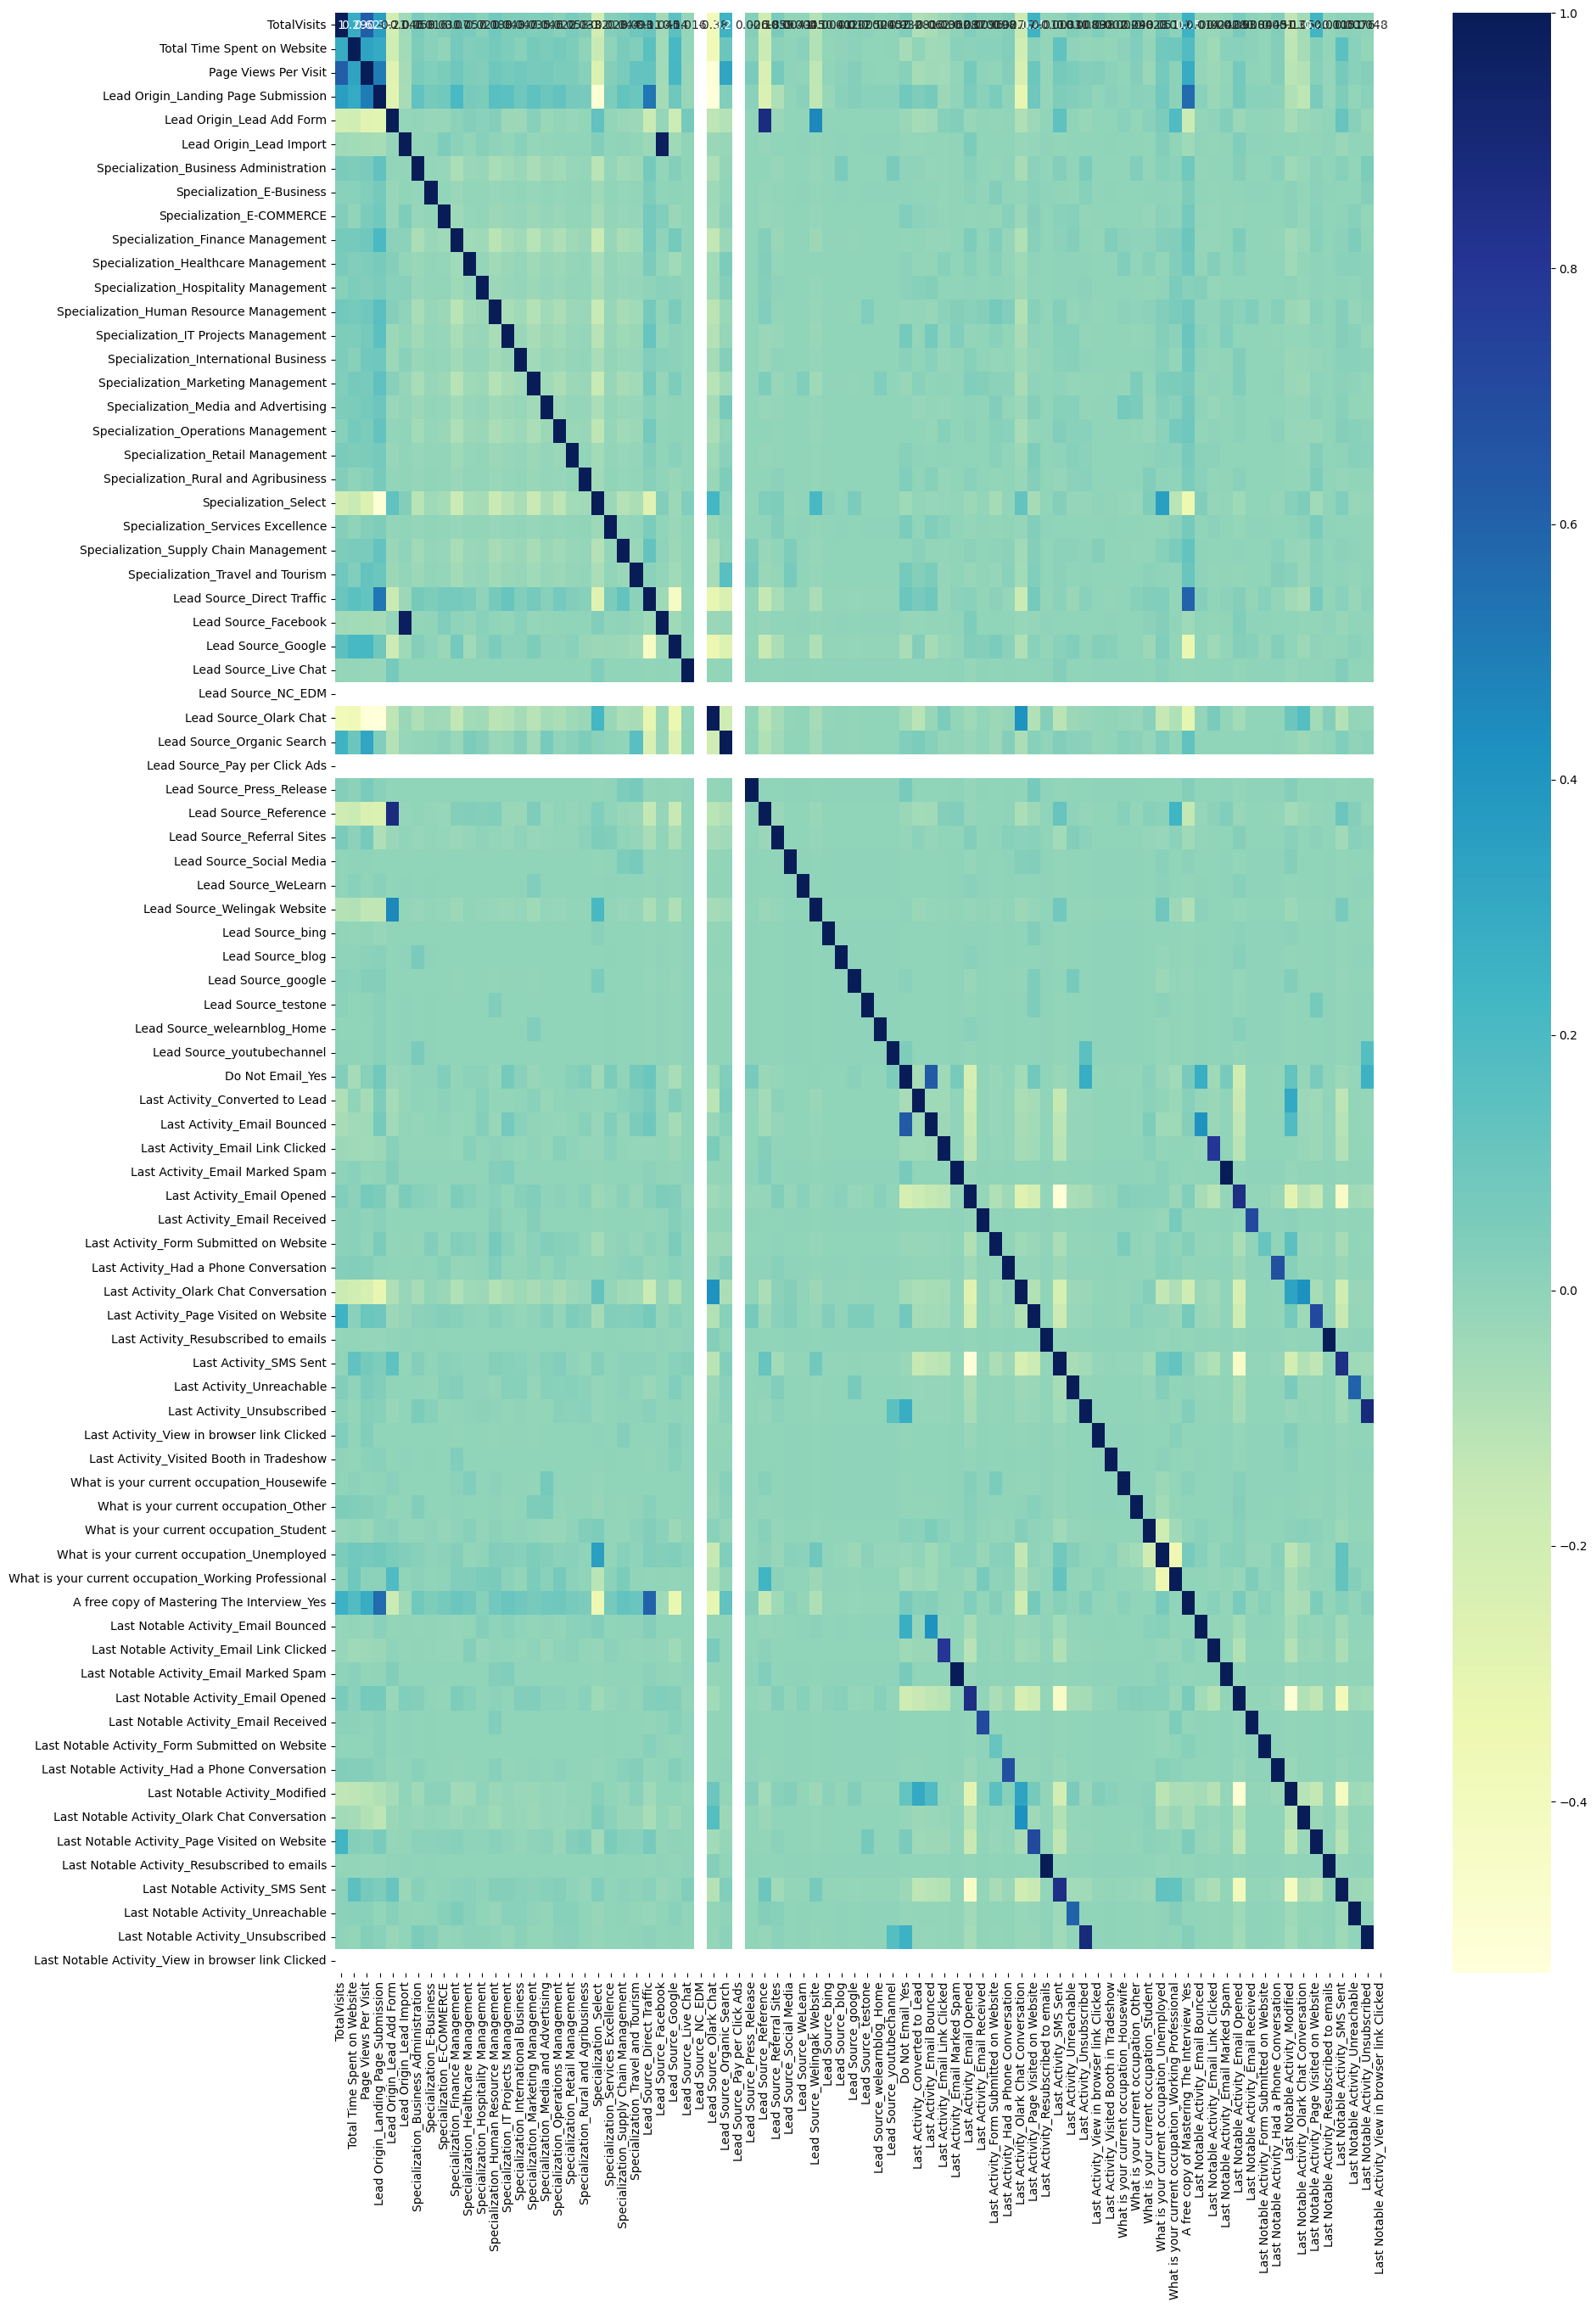

In [1558]:
# checking correlation between all variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

Due to the many variables, dropping them is challenging. We'll perform feature selection using Recursive Feature Elimination (RFE) to identify and drop less important variables.

In [1559]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [1560]:

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [1561]:
rfe = RFE(logReg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [1562]:
# which one selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 13),
 ('Specialization_Human Resource Management', False, 44),
 ('Specialization_IT Projects Management', False, 40),
 ('Specialization_International Business', False, 53),
 ('Specialization_Marketing Management', False, 33),
 ('Specialization_Media and Advertising', False, 60),
 ('Specialization_Operations Management', False, 39),
 ('Specialization_Retail Management', False, 22),
 ('Specialization_Rural and Agribusiness', False, 34),
 ('Specialization_Sele

In [1563]:
columns = X_train.columns[rfe.support_]

# All variables selected by RFE will undergo statistical analysis, including p-values and VIFs, to assess significance and multicollinearity.

In [1564]:
X_train = X_train[columns]

In [1565]:
X_train_sm = sm.add_constant(X_train)
glm1 = sm.GLM(y_train.astype(float) , X_train_sm.astype(float), family = sm.families.Binomial())
response = glm1.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Mon, 19 Aug 2024   Deviance:                       5270.1
Time:                        20:20:12   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_Lead Add Form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_Olark Chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_Welingak Website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_Olark Chat Conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_SMS Sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_Housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_Other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_Student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_Unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_Working Professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_Had a Phone Conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [1566]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


The VIF values are acceptable, but the p-values indicate issues. Therefore, remove the variable 'Last Notable Activity had a phone conversation' to improve model quality.

In [1567]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [1568]:
X_train_sm = sm.add_constant(X_train)
glm2 = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
response = glm2.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Mon, 19 Aug 2024   Deviance:                       5285.6
Time:                        20:20:12   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_Lead Add Form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_Olark Chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_Welingak Website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_Olark Chat Conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_SMS Sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_Housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_Other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_Student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_Unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_Working Professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_Unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [1569]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


The VIF values are acceptable, but the p-values suggest 'What is your current occupation housewife' is not significant. Therefore, we will remove this variable to enhance model performance.

In [1570]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [1571]:
X_train_sm = sm.add_constant(X_train)
glm3 = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
response = glm3.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Mon, 19 Aug 2024   Deviance:                       5302.6
Time:                        20:20:13   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_Lead Add Form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_Olark Chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_Welingak Website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_Olark Chat Conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_SMS Sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_Other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_Student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_Unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_Unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [1572]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.58
7,Last Activity_SMS Sent,1.53
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
11,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


The VIF values are acceptable, but the p-values indicate that 'What is your current occupation other' is not significant. Therefore, we will remove this variable to improve model accuracy.

In [1573]:
X_train.drop('What is your current occupation_Other', axis = 1, inplace = True)

In [1574]:
X_train_sm = sm.add_constant(X_train)
glm4 = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
response = glm4.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.8
Date:                Mon, 19 Aug 2024   Deviance:                       5311.7
Time:                        20:20:13   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4345      0.113    -30.511      0.000      -3.655      -3.214
TotalVisits                                              5.7276      1.459      3.926      0.000       2.868       8.587
Total Time Spent on Website                              4.6142      0.166     27.753      0.000       4.288       4.940
Lead Origin_Lead Add Form                                3.7570      0.225     16.676      0.000       3.315       4.199
Lead Source_Olark Chat                                   1.5780      0.111     14.159      0.000       1.360       1.796
Lead Source_Welingak Website                             2.5828      1.033      2.501      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4412      0.170     -8.470      0.000      -1.775      -1.108
Last Activity_Olark Chat Conversation                   -1.3929      0.167     -8.330      0.000      -1.721      -1.065
Last Activity_SMS Sent                                   1.2616      0.074     17.108      0.000       1.117       1.406
What is your current occupation_Student                  1.2218      0.226      5.401      0.000       0.778       1.665
What is your current occupation_Unemployed               1.1394      0.085     13.408      0.000       0.973       1.306
What is your current occupation_Working Professional     3.6555      0.204     17.914      0.000       3.256       4.055
Last Notable Activity_Unreachable                        1.8066      0.601      3.008      0.003       0.629       2.984
========================================================================================================================
"""

In [1575]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.29
1,Total Time Spent on Website,2.06
0,TotalVisits,1.84
2,Lead Origin_Lead Add Form,1.58
7,Last Activity_SMS Sent,1.53
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
10,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


With all VIF values acceptable and p-values below 0.05, the model is well-validated. We can proceed with finalizing and fixing the model for lead scoring.

# All data is ready for predication

In [1576]:
y_trainPred = response.predict(X_train_sm.astype(float))
y_trainPred[:10]

1289    0.648651
3604    0.135107
5584    0.238085
7679    0.135107
7563    0.495064
7978    0.778219
7780    0.169048
7863    0.982785
838     0.772810
708     0.149226
dtype: float64

In [1577]:
y_trainPred = y_trainPred.values.reshape(-1)
y_trainPred[:10]

array([0.64865119, 0.135107  , 0.23808524, 0.135107  , 0.49506379,
       0.77821892, 0.16904797, 0.98278528, 0.77281013, 0.14922632])

In [1578]:
y_trainFinalPred = pd.DataFrame({'Converted':y_train.values, 'ConversionProbability':y_trainPred})
y_trainFinalPred.head()

,Converted,ConversionProbability
0,1,0.648651
1,0,0.135107
2,0,0.238085
3,0,0.135107
4,0,0.495064


In [1579]:
y_trainFinalPred['Predicted'] = y_trainFinalPred.ConversionProbability.map(lambda x: 1 if x > 0.5 else 0)
y_trainFinalPred.head()

,Converted,ConversionProbability,Predicted
0,1,0.648651,1
1,0,0.135107,0
2,0,0.238085,0
3,0,0.135107,0
4,0,0.495064,0


# Model Evaluation

In [1580]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [1581]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.Predicted.astype(float) )
confusion

array([[3438,  457],
       [ 748, 1708]])

In [1582]:
# Accuracy
metrics.accuracy_score(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.Predicted.astype(float))

0.810266099826799

An accuracy of around 81% is excellent, indicating that the model is effectively predicting lead conversions and performing well on the dataset. This level of accuracy is promising for targeting potential leads.

In [1583]:
# Replace the accuracy formula with the value of true positives.
truePositives = confusion[1,1]
# Replace the accuracy formula with the value of true negatives
trueNegatives = confusion[0,0]
# Replace the accuracy formula with the value of false positives
falsePositives = confusion[0,1] 
# Replace the accuracy formula with the value of false negatives
falseNegatives = confusion[1,0]

In [1584]:
# Sensitivity
truePositives/(truePositives+falseNegatives)


0.6954397394136808

In [1585]:
# Specificity
trueNegatives/(trueNegatives+falsePositives)

0.8826700898587934

# The model performs well overall in lead prediction and classification, with a cutoff of 0.5 showing about 81% accuracy, 69% sensitivity, and 88% specificity.

# ROC

In [1586]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1587]:
fpr, tpr, thresholds = metrics.roc_curve( y_trainFinalPred.Converted.astype(float), y_trainFinalPred.ConversionProbability.astype(float), drop_intermediate = False )

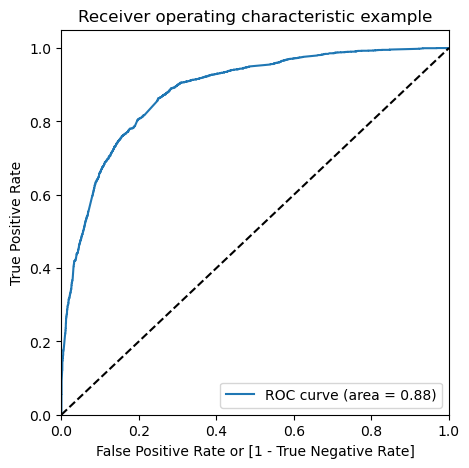

In [1588]:
roc(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.ConversionProbability.astype(float))

Excellent model performance is shown by a ROC curve area of 0.88, which shows a good ability to differentiate between positive and negative leads.

In [1589]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_trainFinalPred[i]= y_trainFinalPred.ConversionProbability.map(lambda x: 1 if x > i else 0)
y_trainFinalPred.head()

,Converted,ConversionProbability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0


In [1590]:
cutoffLead = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [1591]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusionMatrix = metrics.confusion_matrix(y_trainFinalPred.Converted.astype(float), y_trainFinalPred[i].astype(float) )
    total1=sum(sum(confusionMatrix))
    accuracy = (confusionMatrix[0,0]+confusionMatrix[1,1])/total1
    
    specificity = confusionMatrix[0,0]/(confusionMatrix[0,0]+confusionMatrix[0,1])
    sensitivity = confusionMatrix[1,1]/(confusionMatrix[1,0]+confusionMatrix[1,1])
    cutoffLead.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoffLead

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577547,0.983713,0.321438
0.2,0.2,0.758463,0.913681,0.660591
0.3,0.3,0.788380,0.872557,0.735302
0.4,0.4,0.809321,0.764658,0.837484
0.5,0.5,0.810266,0.695440,0.882670
0.6,0.6,0.802551,0.627443,0.912965
0.7,0.7,0.772792,0.501629,0.943774
0.8,0.8,0.753110,0.413274,0.967394
0.9,0.9,0.706345,0.259772,0.987933


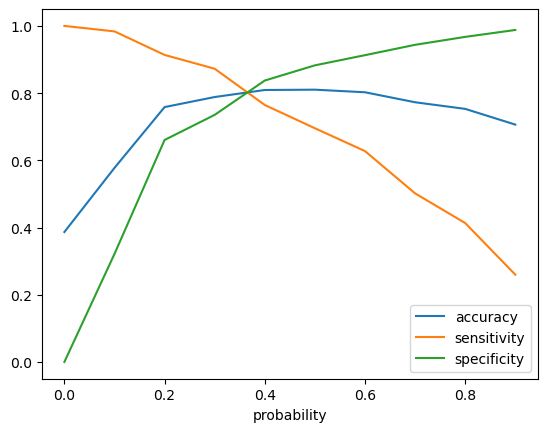

In [1592]:
cutoffLead.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

The graph shows that the optimal cutoff is at 0.35, suggesting that adjusting the threshold to this value may enhance the model’s performance for lead prediction.








In [1593]:
y_trainFinalPred['finalPredicted'] = y_trainFinalPred.ConversionProbability.map( lambda x: 1 if x > 0.35 else 0)
y_trainFinalPred.head()

,Converted,ConversionProbability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,finalPredicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [1594]:
metrics.accuracy_score(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.finalPredicted.astype(float))

0.8031806014800819

In [1595]:
confusionMetrics2 = metrics.confusion_matrix(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.finalPredicted.astype(float) )
confusionMetrics2

array([[3126,  769],
       [ 481, 1975]])

In [1596]:
# Replace the accuracy formula with the value of true positive
truePositive = confusionMetrics2[1,1]
# Replace the accuracy formula with the value of true negatives
trueNegatives = confusionMetrics2[0,0]
# Replace the accuracy formula with the value of false positives
falsePositives = confusionMetrics2[0,1] 
# Replace the accuracy formula with the value of false negatives
falseNegatives = confusionMetrics2[1,0]

In [1597]:
# Sensitivity
truePositive/(truePositive+falseNegatives)

0.8041530944625407

In [1598]:
# Specificity
trueNegatives/(trueNegatives+falsePositives)

0.8025673940949936

The model performs well overall in lead prediction and classification, with a cutoff of 0.35 showing about 80% accuracy, 80% sensitivity, and 80% specificity.

# Prediction on Test

In [1599]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [1600]:
columns = X_train.columns

In [1601]:
X_test = X_test[columns]
X_test_sm = sm.add_constant(X_test[columns])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,False,False,False,False,False,False,False,True,False,False
7212,1.0,0.028369,0.001320,False,False,False,False,False,True,False,False,True,False
2085,1.0,0.000000,0.000000,True,False,True,False,False,False,False,True,False,False
4048,1.0,0.028369,0.617077,False,False,False,False,False,True,False,True,False,False
4790,1.0,0.028369,0.005282,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,True,False,False,True,False,False,True,False,False
8179,1.0,0.170213,0.148768,False,False,False,False,False,True,False,False,False,False
6236,1.0,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False
5240,1.0,0.078014,0.458627,False,False,False,False,False,True,False,True,False,False


In [1602]:
y_testPred = response.predict(X_test_sm.astype(float))

In [1603]:
y_predLead = pd.DataFrame(y_testPred)

In [1604]:
y_testLead = pd.DataFrame(y_test)


In [1605]:

y_predLead.reset_index(drop=True, inplace=True)
y_testLead.reset_index(drop=True, inplace=True)


In [1606]:

y_FinalPred = pd.concat([y_testLead, y_predLead],axis=1)


In [1607]:
# Renaming column 
y_FinalPred= y_FinalPred.rename(columns = {0 : 'ConversionProbability'})
y_FinalPred.head()

,Converted,ConversionProbability
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [1608]:
y_FinalPred['finalPredicted'] = y_FinalPred.ConversionProbability.map(lambda x: 1 if x > 0.35 else 0)
y_FinalPred

,Converted,ConversionProbability,finalPredicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0
...,...,...,...
2718,1,0.108126,0
2719,0,0.374824,1
2720,0,0.135107,0
2721,1,0.821933,1


In [1609]:
metrics.accuracy_score(y_FinalPred['Converted'].astype(float), y_FinalPred.finalPredicted.astype(float))

0.8094013955196474

In [1610]:
confusionMetrics2 = metrics.confusion_matrix(y_FinalPred['Converted'].astype(float), y_FinalPred.finalPredicted.astype(float) )
confusionMetrics2

array([[1406,  338],
       [ 181,  798]])

In [1611]:
# Replace the accuracy formula with the value of true positive
truePositive = confusionMetrics2[1,1]
# Replace the accuracy formula with the value of true negatives
trueNegatives = confusionMetrics2[0,0]
# Replace the accuracy formula with the value of false positives
falsePositives = confusionMetrics2[0,1] 
# Replace the accuracy formula with the value of false negatives
falseNegatives = confusionMetrics2[1,0]

In [1612]:
# Sensitivity
truePositive/(truePositive+falseNegatives)

0.81511746680286

In [1613]:
# specificity
trueNegatives/(trueNegatives+falsePositives)

0.8061926605504587

The model performs well overall in lead prediction and classification, with a cutoff of 0.35 showing about 80% accuracy, 81% sensitivity, and 80% specificity.

# Precision

In [1614]:
confusion = metrics.confusion_matrix(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.Predicted.astype(float) )
confusion

array([[3438,  457],
       [ 748, 1708]])

In [1615]:
metrics.accuracy_score(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.Predicted.astype(float))

0.810266099826799

In [1616]:
# Replace the accuracy formula with the value of true positive
truePositive = confusion[1,1]
# Replace the accuracy formula with the value of true negatives
trueNegatives = confusion[0,0]
# Replace the accuracy formula with the value of false positives
falsePositives = confusion[0,1] 
# Replace the accuracy formula with the value of false negatives
falseNegatives = confusion[1,0]

In [1617]:
# Sensitivity
truePositive/(truePositive+falseNegatives)

0.6954397394136808

In [1618]:
# Specificity
trueNegatives/(trueNegatives+falsePositives)

0.8826700898587934

The model performs well overall in lead prediction and classification, with a cutoff of 0.5 showing about 81% accuracy, 69% sensitivity, and 88% specificity.

# Tradeoff

In [1619]:
y_trainFinalPred.Converted, y_trainFinalPred.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: object,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [1620]:
p, r, thresholds = precision_recall_curve(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.ConversionProbability.astype(float))

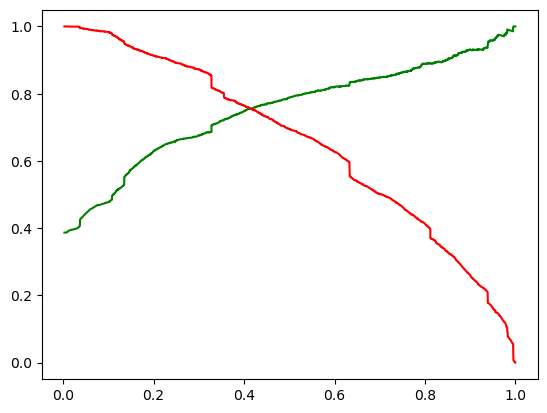

In [1621]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1622]:
y_trainFinalPred['finalPredicted'] = y_trainFinalPred.ConversionProbability.map(lambda x: 1 if x > 0.41 else 0)
y_trainFinalPred.head()

,Converted,ConversionProbability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,finalPredicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [1623]:
# Accuracy
metrics.accuracy_score(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.finalPredicted.astype(float))

0.8112108329396945

In [1624]:
confusionMetrics2 = metrics.confusion_matrix(y_trainFinalPred.Converted.astype(float), y_trainFinalPred.finalPredicted.astype(float) )
confusionMetrics2

array([[3289,  606],
       [ 593, 1863]])

In [1625]:
# Replace the accuracy formula with the value of true positive
truePositive = confusion[1,1]
# Replace the accuracy formula with the value of true negatives
trueNegatives = confusion[0,0]
# Replace the accuracy formula with the value of false positives
falsePositives = confusion[0,1] 
# Replace the accuracy formula with the value of false negatives
falseNegatives = confusion[1,0]

In [1626]:
# Sensitivity
truePositive/(truePositive+falseNegatives)

0.6954397394136808

In [1627]:
# Specificity
trueNegatives/(trueNegatives+falsePositives)

0.8826700898587934

The model performs well overall in lead prediction and classification, with a cutoff of 0.41 showing about 81% accuracy, 69% sensitivity, and 88% specificity.

# Prediction on Test 

In [1628]:
y_testPred = response.predict(X_test_sm.astype(float))


In [1629]:
y_predLead = pd.DataFrame(y_testPred)

In [1630]:
y_testLead = pd.DataFrame(y_test)

In [1631]:
y_predLead.reset_index(drop=True, inplace=True)
y_testLead.reset_index(drop=True, inplace=True)

In [1632]:
y_finalPred = pd.concat([y_testLead, y_predLead],axis=1)

In [1633]:
y_finalPred= y_finalPred.rename(columns = {0 : 'ConversionProbability'})
y_finalPred.head()

,Converted,ConversionProbability
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [1634]:
y_finalPred['finalPredicted'] = y_finalPred.ConversionProbability.map(lambda x: 1 if x > 0.41 else 0)
y_finalPred

,Converted,ConversionProbability,finalPredicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0
...,...,...,...
2718,1,0.108126,0
2719,0,0.374824,0
2720,0,0.135107,0
2721,1,0.821933,1


In [1635]:
metrics.accuracy_score(y_finalPred['Converted'].astype(float), y_finalPred.finalPredicted.astype(float))

0.8149100257069408

In [1636]:
confusionMetrics2 = metrics.confusion_matrix(y_finalPred['Converted'].astype(float), y_finalPred.finalPredicted.astype(float))
confusionMetrics2

array([[1472,  272],
       [ 232,  747]])

In [1637]:
# Replace the accuracy formula with the value of true positive
truePositive = confusion[1,1]
# Replace the accuracy formula with the value of true negatives
trueNegatives = confusion[0,0]
# Replace the accuracy formula with the value of false positives
falsePositives = confusion[0,1] 
# Replace the accuracy formula with the value of false negatives
falseNegatives = confusion[1,0]

In [1638]:
# Sensitivity
truePositive/(truePositive+falseNegatives)

0.6954397394136808

In [1639]:
# Specificity
trueNegatives/(trueNegatives+falsePositives)

0.8826700898587934

The model performs well overall in lead prediction and classification, with a cutoff of 0.41 showing about 81% accuracy, 69% sensitivity, and 88% specificity.

# Conclusion:

1. Total Time Spent on Website:
     The total time a lead spends on the website is the most crucial factor. Longer engagement typically indicates higher interest and potential for conversion.

2. Total Number of Visits:
     The frequency of visits by a lead reflects their level of interest. More visits generally correlate with a higher likelihood of conversion, as it shows persistent engagement.

3. Lead Source:

     . Google: Leads originating from Google search are highly valuable, indicating targeted interest.

     . Direct Traffic: Direct traffic signifies strong brand recognition or prior engagement.

     . Organic Search: Leads from organic search show a genuine interest driven by content relevance.

     . Welingak Website: Specific website sources like Welingak also play a significant role, indicating targeted interest.

4. Last Activity:

     . SMS: Recent SMS interactions are crucial, as they are often timely and personal.

     . Olark Chat Conversation: Conversations through chat platforms like Olark are indicative of high engagement and interest.

5. Lead Origin: 
     Leads from the "Lead add format" are more likely to convert, suggesting that the format of the lead capture influences potential.

6. Current Occupation: 
     Leads who are working professionals generally have a higher likelihood of conversion, likely due to their immediate need for further education or career advancement.

By prioritizing these factors, X Education can strategically target potential buyers and significantly improve their conversion rates.